In [238]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [239]:
data= pd.read_csv('all_stream_info.csv')

In [240]:
data.head()

,liveStreamID,beginTime,endTime,duration,closeBy,maxLiveViewerCount,maxLiveViewerTime,privateLiveStream,receivedLikeCount,streamerType,...,durationGTE5sec,durationGTE2min,durationGTE10min,totalViewerDuration,avgViewerDuration,avgStreamJoinDuration,count,followIncreaseEstimated,receivePointEstimated,dau
0,109437538,2020-06-22 11:55:21 UTC,2020-06-22 16:37:19 UTC,16918,normalEnd,363,2020-06-22 16:28:17.87 UTC,0,11092,0,...,68,17,13,32248.0,424.32,228.71,1108,5,13105,NaN
1,109441785,2020-06-22 14:55:26 UTC,2020-06-22 21:31:19 UTC,23753,normalEnd,100,2020-06-22 19:07:52.872 UTC,0,772,0,...,68,20,8,17138.0,186.28,134.94,2318,-3,90701,NaN
2,109438205,2020-06-22 12:20:34 UTC,2020-06-22 16:02:46 UTC,13332,disconnect,471,2020-06-22 14:53:26.692 UTC,0,19403,0,...,696,60,17,60852.0,81.14,34.46,1199,7,222376,NaN
3,109438917,2020-06-22 12:54:21 UTC,2020-06-22 14:47:27 UTC,6786,normalEnd,44,2020-06-22 14:29:13.806 UTC,0,191,0,...,41,12,8,18326.0,389.91,213.09,432,0,4313,NaN
4,109442185,2020-06-22 15:18:20 UTC,2020-06-22 15:48:02 UTC,1782,normalEnd,52,2020-06-22 15:42:33.849 UTC,0,77,0,...,38,17,5,8465.0,222.76,138.77,162,0,1547,NaN


In [241]:
# checking null values in the data.
data.isnull().sum()

liveStreamID                  0
beginTime                     0
endTime                       0
duration                      0
closeBy                      97
maxLiveViewerCount            0
maxLiveViewerTime          1310
privateLiveStream             0
receivedLikeCount             0
streamerType                  0
isShow                        0
cultureGroup               3148
userID                        0
registerTime                  0
registerCountry               0
isContracted               3148
uniqueViewerCount             0
ios                           0
android                       0
durationGTE5sec               0
durationGTE2min               0
durationGTE10min              0
totalViewerDuration        1459
avgViewerDuration          1459
avgStreamJoinDuration      1459
count                         0
followIncreaseEstimated       0
receivePointEstimated         0
dau                        3148
dtype: int64

In [242]:
# dropping culturegroup, iscontracted, dau beacuse they only contain null values.
data.drop(columns=['cultureGroup','isContracted','dau'], axis=1, inplace=True)

In [243]:
data.isnull().sum()

liveStreamID                  0
beginTime                     0
endTime                       0
duration                      0
closeBy                      97
maxLiveViewerCount            0
maxLiveViewerTime          1310
privateLiveStream             0
receivedLikeCount             0
streamerType                  0
isShow                        0
userID                        0
registerTime                  0
registerCountry               0
uniqueViewerCount             0
ios                           0
android                       0
durationGTE5sec               0
durationGTE2min               0
durationGTE10min              0
totalViewerDuration        1459
avgViewerDuration          1459
avgStreamJoinDuration      1459
count                         0
followIncreaseEstimated       0
receivePointEstimated         0
dtype: int64

In [244]:
data.nunique()

liveStreamID               3148
beginTime                  3139
endTime                    3137
duration                   2025
closeBy                      10
maxLiveViewerCount          196
maxLiveViewerTime          1838
privateLiveStream             1
receivedLikeCount           581
streamerType                  1
isShow                        1
userID                     1000
registerTime                999
registerCountry               1
uniqueViewerCount           358
ios                         234
android                     232
durationGTE5sec             326
durationGTE2min             123
durationGTE10min             74
totalViewerDuration        1541
avgViewerDuration          1564
avgStreamJoinDuration      1555
count                       569
followIncreaseEstimated      68
receivePointEstimated      1108
dtype: int64

In [245]:
# now we would be removing the columns with single unique value as they contain only one value and not usefull for analysis.
data.drop(columns=['registerCountry','isShow','streamerType','privateLiveStream'], axis=1, inplace=True)

In [250]:
# converting the begintime, endtime, maxliveviewertime to date_time for easier calculations.
data['beginTime']=pd.to_datetime(data['beginTime'])
data['endTime']=pd.to_datetime(data['endTime'])

In [251]:
data['maxLiveViewerTime']=pd.to_datetime(data['maxLiveViewerTime'], errors='coerce')

In [255]:
# Average of people who leave stream in first 5sec.
avg_of_durationGTR5sec = data['durationGTE5sec'].mean()
print(avg_of_durationGTR5sec)

44.560991105463785


In [256]:
# Average of people who leave stream in first 2min.
avg_of_durationGTR2min = data['durationGTE2min'].mean()
print(avg_of_durationGTR2min)

8.994917407878019


In [257]:
# Average of people who leave stream in first 10min.
avg_of_durationGTR10min = data['durationGTE10min'].mean()
print(avg_of_durationGTR10min)

3.93710292249047


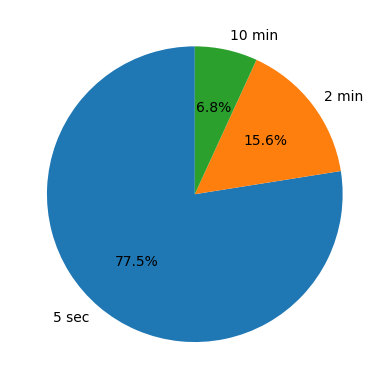

In [258]:
# plotting a pie chart to visaulize the duration of viewer in the stream.
values= [avg_of_durationGTR5sec, avg_of_durationGTR2min, avg_of_durationGTR10min]
labels= ['5 sec', '2 min', '10 min']
plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=90)
plt.show()

We can conclude that most viewers leave the stream within the first 5 seconds, so an ad should be played as soon as the viewer starts the stream.

In [259]:
# Calculating the peak time (in seconds) in the stream where the viewers are maximum and high interaction of viewers is observed.
data.loc[:, 'time_to_peak'] = (data['maxLiveViewerTime'] - data['beginTime']).dt.total_seconds()

In [268]:
# calculating what percent of total duration is the peak time.
data.loc[:, 'peak_percent'] = (data['time_to_peak'] / data['duration']) * 100

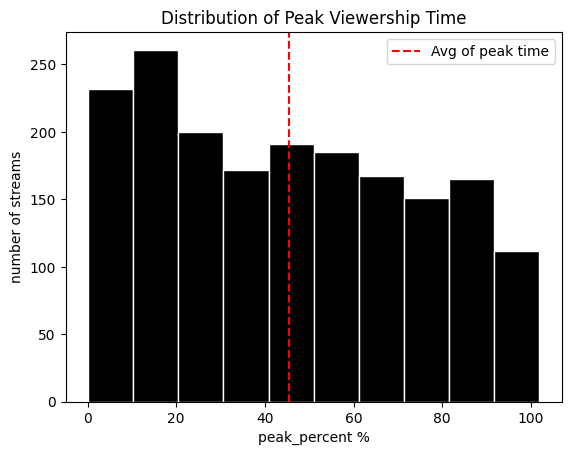

In [261]:
plt.hist(data['peak_percent'], bins=10, edgecolor='white', color='black')
plt.axvline(data['peak_percent'].mean(), linestyle='--', label='Avg of peak time', color='red')
plt.xlabel('peak_percent %')
plt.ylabel('number of streams')
plt.title('Distribution of Peak Viewership Time')
plt.legend()
plt.show()

Referring to the above graph , most of the streams reach their peak point approx. at 20% mark (before avg), hence placing ads at that time could capture more audience.



C:\Users\Raghavendra\AppData\Local\Temp\ipykernel_3616\3589692100.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


Text(0.5, 0, 'Type of stream')

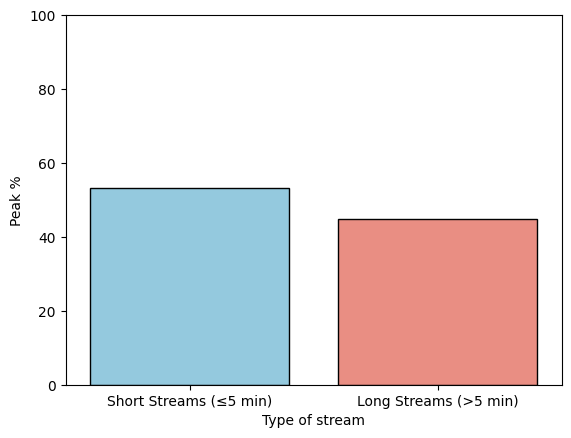

In [262]:
# Calculating the peak percent in long and short streams.
longstreams=data[(data['duration']/60)>5]
shortstreams=data[(data['duration']/60)<=5]

long_mean = longstreams['peak_percent'].mean()
short_mean = shortstreams['peak_percent'].mean()
# plt.figure(figsize=(8, 5))
sns.barplot(
    x=['Short Streams (≤5 min)','Long Streams (>5 min)'],
    y=[short_mean, long_mean],
    palette=['skyblue', 'salmon'],
    edgecolor='black'
)
plt.ylabel('Peak %')
plt.ylim(0,100)
plt.xlabel('Type of stream')


When segmenting streams by duration, we found that short streams (≤5 minutes) typically reach peak viewership earlier, around 53.83% of the stream duration, while longer streams (>10 minutes) peak slightly later, around 44.86%. This insight suggests that for short streams, advertisements should be shown very early whereas for longer streams we can place the ads a bit later in the middle.
short -> 55% of 5min = 2.5min aporox. ad placement time.
long  -> 45% of 10min = 4.5 min approx. ad placement time ( just for reference actual may vary on stream length).

In [263]:
# calculating the peak viewership hour of the day.
data['hour_of_day']= data['maxLiveViewerTime'].dt.hour

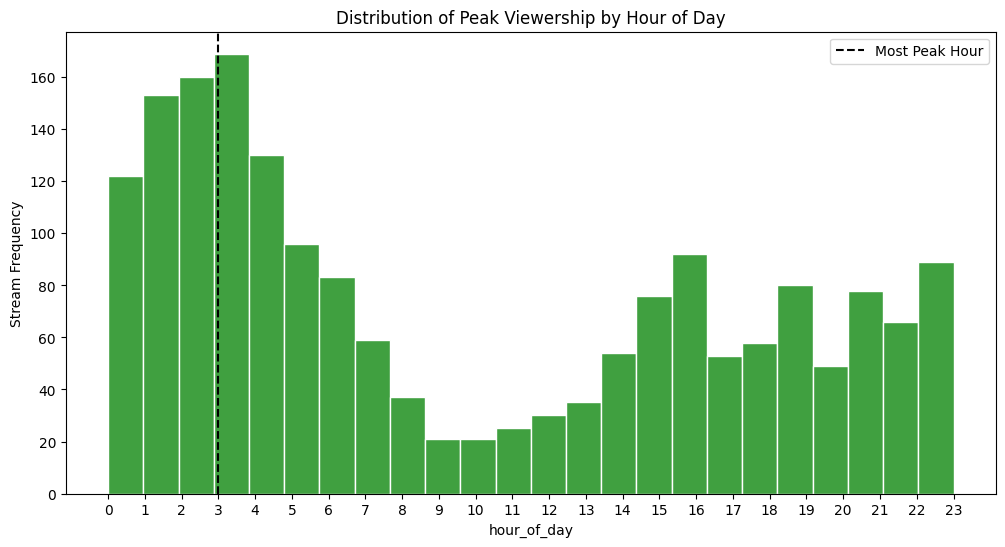

In [264]:
data['hour_of_day']= data['maxLiveViewerTime'].dt.hour
plt.figure(figsize=(12,6))
plt.title('Distribution of Peak Viewership by Hour of Day')
sns.histplot(x='hour_of_day', bins=24, data=data, color='green',edgecolor='white')
plt.axvline(data['hour_of_day'].mode()[0],color='black', linestyle='--', label='Most Peak Hour')
plt.ylabel('Stream Frequency')
plt.legend()
plt.xticks(range(0,24))
plt.show()

In [265]:
data['hour_of_day'].value_counts().sort_index().head()

hour_of_day
0.0    122
1.0    153
2.0    160
3.0    169
4.0    130
Name: count, dtype: int64

From the above histplot we can conclude that most streams reach peak viewer activity around 1–3 AM, especially at 3 AM. This suggests that early morning hours attract high viewer engagement making it another useful insgiht for ad placement.

In [266]:
ios_count=data['ios'].sum()
android_count=data['android'].sum()

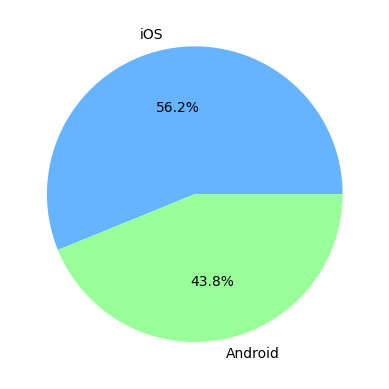

In [267]:
plt.pie(x=[ios_count, android_count], labels=['iOS', 'Android'], autopct='%1.1f%%', colors=['#66b3ff', '#99ff99'])
plt.show()

In [282]:
data.columns

Index(['liveStreamID', 'beginTime', 'endTime', 'duration', 'closeBy',
       'maxLiveViewerCount', 'maxLiveViewerTime', 'receivedLikeCount',
       'userID', 'registerTime', 'uniqueViewerCount', 'ios', 'android',
       'durationGTE5sec', 'durationGTE2min', 'durationGTE10min',
       'totalViewerDuration', 'avgViewerDuration', 'avgStreamJoinDuration',
       'count', 'followIncreaseEstimated', 'receivePointEstimated',
       'durationinmin', 'typeofstream', 'time_to_peak', 'peak_percent',
       'hour_of_day', 'hour_of_begin'],
      dtype='object')

In [283]:
data['hour_of_begin']=data['beginTime'].dt.hour

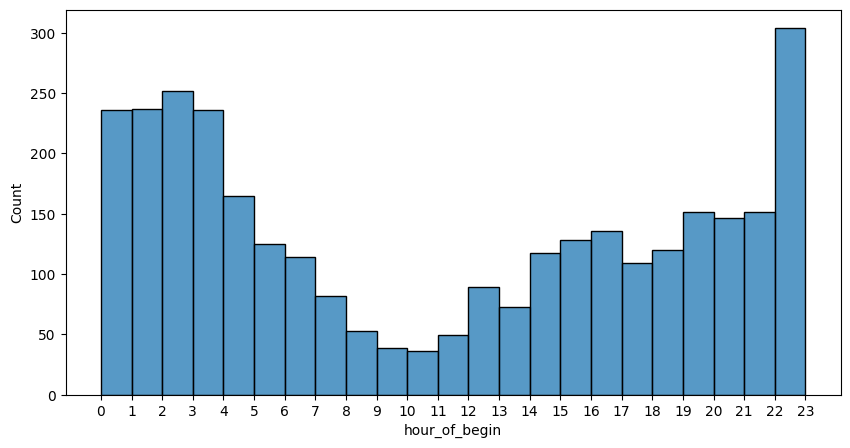

In [288]:
plt.figure(figsize=(10,5))
sns.histplot(x='hour_of_begin', bins=23, data=data , edgecolor='black')
plt.xticks(range(0,24))
plt.show()